# 1. Read the dataset and display some information about the dataset

In [1]:
#Import required libraries and read the dataset
import numpy as np 
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, PowerTransformer, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import warnings
warnings.filterwarnings("ignore")
#reading the dataset
df=pd.read_csv("C:\\Users\\suhas\\Downloads\\bank_loan_defaulter.csv")


In [2]:
#Check the first few samples, shape, info of the data and try to familiarize yourself with different features.
df.head(5)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [3]:
#To check the size of the dataset
df.shape

#there are 67,463 records and 35 rows in total

(67463, 35)

In [4]:
# To check the basic info of the features of the dataset
df.info()

#out of 35 columns 9 columns are of float datatype,17 columns are of int datatype and 9 columns are of object datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

# 2. Data cleansing and Exploratory data analysis:

In [5]:
#Check if there are any duplicate records in the dataset? if any drop them, and check the percentage of missing values, if any? 
#treat them with appropriate methods
df.duplicated()

#there are no duplicate values in the dataset

0        False
1        False
2        False
3        False
4        False
         ...  
67458    False
67459    False
67460    False
67461    False
67462    False
Length: 67463, dtype: bool

In [6]:
#Checking for the presence of missing values
df.isnull().sum()
#There are no missing values in the dataset

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [7]:
#Check summary statistics of the dataset, and write your key observations
df.describe()

#loan amount
#total-67462 records in this column
#mean-the average loan amount is 16,848 rs
#min- minimum loan amount ia 1014 rs
#max- maximum loan amount is 35000 rs
#std- standard deviation is 8367 rs
#25%,50%,75% quartiles - 10012 rs,16073 rs,22106 rs respectively

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


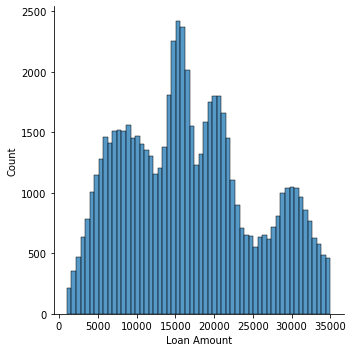

In [8]:
#Perform necessary univariate and multivariate analysis

#Plotting displot to check the  different loan amounts sanctioned to customers

sns.displot(df['Loan Amount'])
#Loan amount ranges from 2000 to 35,000 Rs and majority of people have taken loan between 15,000 and 25,000Rs


<AxesSubplot:xlabel='Grade', ylabel='count'>

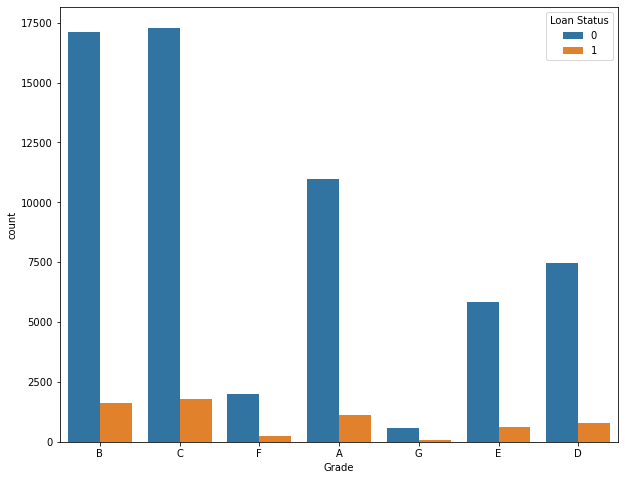

In [9]:
# Plotting countplot on 'Grade'
plt.figure(figsize = (10,8))
sns.countplot(x = 'Grade', data = df, hue = 'Loan Status')

In [10]:
#Performing  multivariate analysis so that we can know which columns are highly correlated to the target column

plt.figure(figsize=(9,6))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')



,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
ID,1.000000,-0.003480,-0.003302,0.002954,0.003226,0.004258,-0.004390,-0.010578,0.000568,-0.006628,-0.002781,0.009830,0.004315,0.000910,0.001518,-0.002938,0.006674,-0.001435,-0.001802,-0.002900,0.000907,nan,0.003745,-0.003572,-0.005141,0.000472
Loan Amount,-0.003480,1.000000,-0.000551,0.002831,0.004277,-0.004888,0.016691,0.007959,-0.000469,0.008962,0.009088,-0.002542,-0.001738,0.014828,-0.002071,-0.001887,-0.000034,-0.001606,-0.002142,-0.002726,-0.002362,nan,-0.004135,-0.008285,0.002289,-0.004473
Funded Amount,-0.003302,-0.000551,1.000000,0.010227,-0.001503,0.002310,-0.003518,0.002347,0.011313,-0.001587,0.005755,0.003750,-0.004485,0.004460,0.008298,0.002759,0.001542,0.000462,0.000175,0.001071,-0.003476,nan,-0.002821,-0.001499,0.006145,0.001364
Funded Amount Investor,0.002954,0.002831,0.010227,1.000000,-0.008943,-0.001917,0.001339,0.000112,0.001925,-0.003073,-0.007850,0.005002,-0.009102,-0.003027,0.003191,0.001432,-0.000232,0.000966,-0.007272,0.001814,0.004248,nan,0.006862,0.003283,0.005669,-0.000091
Term,0.003226,0.004277,-0.001503,-0.008943,1.000000,-0.012688,-0.021813,0.001026,-0.004494,-0.005272,0.021362,-0.002827,-0.002317,-0.010018,0.001204,0.008663,-0.000736,-0.003475,-0.001203,-0.003263,0.007035,nan,0.000358,0.003361,-0.005068,-0.003410
Interest Rate,0.004258,-0.004888,0.002310,-0.001917,-0.012688,1.000000,0.005467,-0.011203,0.004045,0.009172,-0.003250,0.006979,0.018999,0.006089,0.006584,0.006998,0.003119,0.009348,0.001281,-0.009895,-0.012652,nan,0.002771,-0.002567,0.016651,0.002900
Home Ownership,-0.004390,0.016691,-0.003518,0.001339,-0.021813,0.005467,1.000000,0.022781,-0.003793,0.005024,0.009080,0.005631,0.016783,-0.005556,0.021452,-0.010346,0.004011,0.004399,-0.003821,-0.002639,-0.004573,nan,0.006314,0.007117,0.005008,0.003716
Debit to Income,-0.010578,0.007959,0.002347,0.000112,0.001026,-0.011203,0.022781,1.000000,-0.004007,0.002246,0.001100,-0.007813,-0.011414,0.003691,-0.005683,0.006504,-0.010224,-0.009693,0.002200,-0.000716,0.008639,nan,0.001555,-0.011582,-0.007236,-0.003057
Delinquency - two years,0.000568,-0.000469,0.011313,0.001925,-0.004494,0.004045,-0.003793,-0.004007,1.000000,0.014679,0.004904,0.006716,0.009394,0.002474,-0.003085,-0.004511,0.007943,0.017348,0.002707,0.003451,0.001160,nan,0.005642,0.002602,0.009315,0.009990
Inquires - six months,-0.006628,0.008962,-0.001587,-0.003073,-0.005272,0.009172,0.005024,0.002246,0.014679,1.000000,-0.002109,0.004087,0.002457,0.005150,0.007562,0.009556,0.008296,0.012487,0.008388,-0.004436,-0.004453,nan,-0.002210,0.001531,0.004678,0.000578


<Figure size 648x432 with 0 Axes>

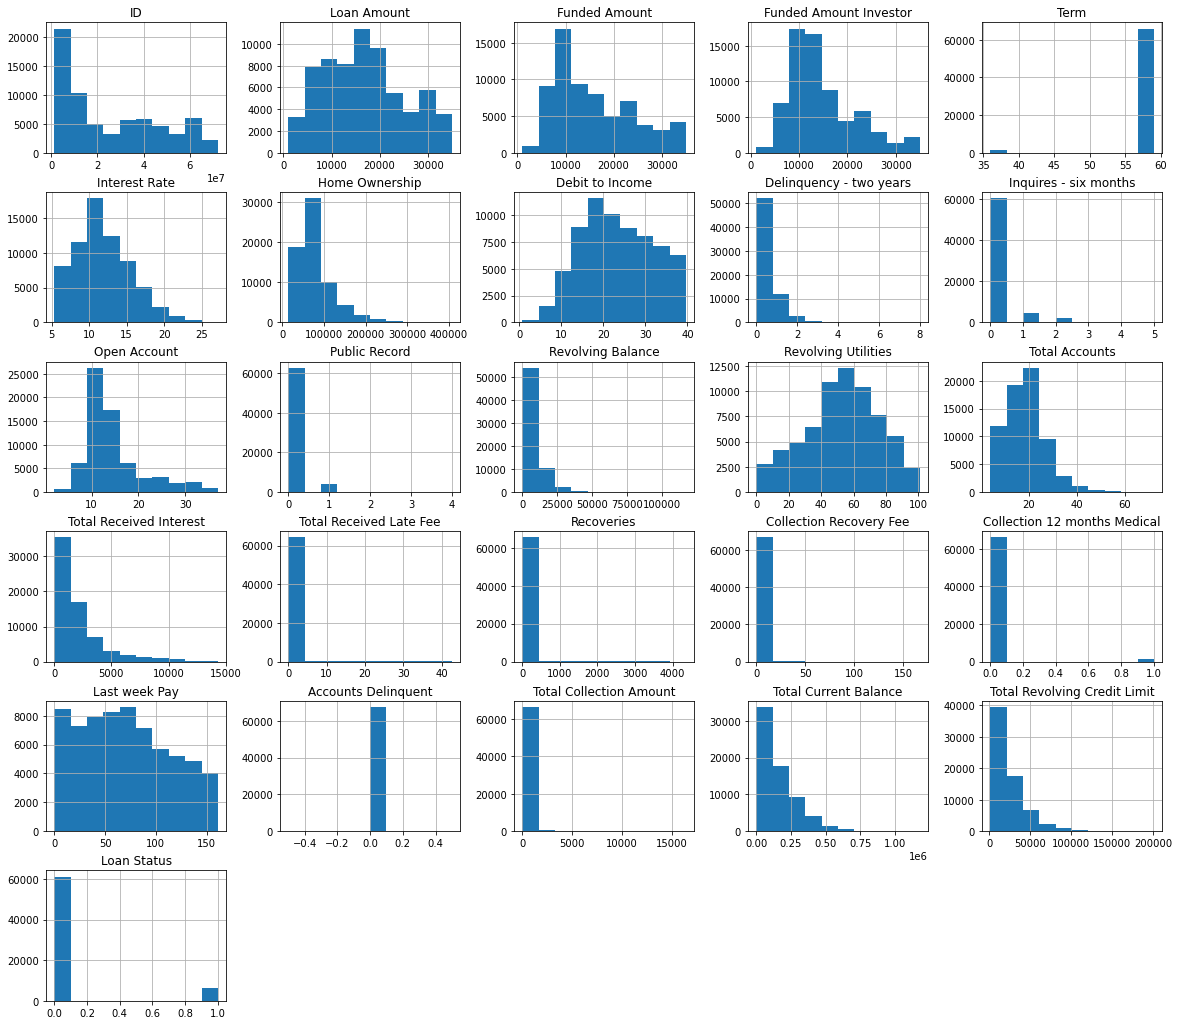

In [11]:
# Histogram to dheck the distribution of data in all the columns
df.hist(figsize=(20,18))
plt.show()

In [12]:
# Dropping the redundant columns
#Drop the columns which you think redundant for the analysis.
df=df.drop(['ID','Batch Enrolled','Sub Grade','Payment Plan','Loan Title','Inquires - six months','Open Account','Revolving Utilities','Collection Recovery Fee','Collection 12 months Medical','Application Type','Accounts Delinquent'],axis=1)

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

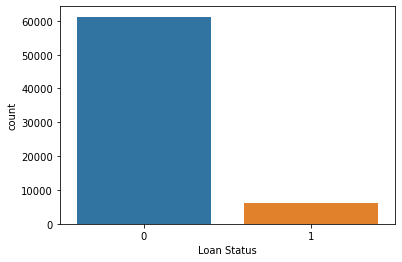

In [13]:
#Check the distribution of the target column 'Loan Status', and comment on the class distribution.

#Lets check the distribution of data in the target column(Univariate analysis)
sns.countplot(df['Loan Status'])

#from the below plot we can see that the data is highly biased with 60000 defaulters and 5000 non defaulters

# 3. Data preparation for model building:


In [14]:
#Segregate the target and independent features.

#Taking a sample of data for better analysis
df1=df.sample(30000)

y=df1['Loan Status']
X = df1.drop(['Loan Status'],axis=1)

#encoding using on hot encoder
X = pd.get_dummies(X,prefix = 'Type')
X.sample(5)

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Public Record,Revolving Balance,...,Type_F,Type_G,Type_MORTGAGE,Type_OWN,Type_RENT,Type_Not Verified,Type_Source Verified,Type_Verified,Type_f,Type_w
46202,7926,13097,20994.188940,59,9.107192,25852.54484,22.453279,0,0,11826,...,0,0,1,0,0,0,0,1,0,1
51752,16505,9388,7763.906945,59,15.953696,62163.43330,25.027003,1,1,9929,...,0,0,1,0,0,1,0,0,1,0
8610,6177,20066,9957.304459,59,17.668529,111664.03850,14.242768,0,1,7729,...,0,0,1,0,0,0,1,0,0,1
66027,19163,31676,21946.174070,59,15.383349,120107.81780,30.351935,1,0,8711,...,0,0,1,0,0,0,1,0,1,0
43263,10678,16777,10363.288450,59,11.141729,24532.86790,16.380878,0,0,1431,...,0,0,1,0,0,0,1,0,0,1


In [15]:
# Splitting the original dataset into train and test

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X,y, test_size=0.20, random_state=42)


In [16]:
#Handle the imbalanced data using over or under sampling approach, and check the distribution of the re-sampled target class.
df1['Loan Status'].value_counts()
#There are 61222 non-defaulters and 6241 defaulters

0    27254
1     2746
Name: Loan Status, dtype: int64

In [17]:
# balancing the imbalanced data using Oversampling approach.
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.65)
X_rus,y_rus = smote.fit_resample(X,y)

In [18]:
#checking if both the classes are balanced in target column 
y_rus.value_counts()

0    27254
1    17715
Name: Loan Status, dtype: int64

In [19]:
#Split the data into train and test using the upsampled data  
X_train, X_test, y_train, y_test = train_test_split(X_rus,y_rus,test_size=0.30, random_state=42)

In [20]:
#Select the K best features using wrapper or embedded methods.(it takes 15min to run)

# Build Log Reg  to use in feature selection
logR = LogisticRegression(max_iter=1000)
# Build step forward feature selection
sfs1 = sfs(logR, k_features=15, forward=True, cv=15)
# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

In [21]:
sfs2=sfs1.get_metric_dict()

In [22]:
#Converting result of sf1 to dataframe and recording the column names
sfs2 = pd.DataFrame.from_dict(sfs2)

#finding the indices of the columns
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

#finding the column names using the indices
columnList = list(X)
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Interest Rate', 'Home Ownership', 'Debit to Income', 'Delinquency - two years', 'Public Record', 'Revolving Balance', 'Total Accounts', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Last week Pay']


In [23]:
#dropping the below three columns as they are considered to be redundent according to the wrapper methods
df1=df1.drop(['Funded Amount','Revolving Balance','Total Current Balance'],axis=1)

# 4. Model Building and evaluation:

In [24]:
# Building a simple random forest classifier as a base model using original data.
rf = RandomForestClassifier()
rf.fit(X_train_orig,y_train_orig)

# Prediction on original test data
orig_prediction = rf.predict(X_test_orig)

# Computing Accuracy, Recall for test data
print("Accuracy:",metrics.accuracy_score(orig_prediction,y_test_orig))
print("Recall:",metrics.recall_score(orig_prediction,y_test_orig))


Accuracy: 0.9073333333333333
Recall: 0.0


In [25]:
# Building a simple random forest classifier as a base model using original data.
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

# Prediction on original test data
new_prediction = rf.predict(X_test)

# Computing Accuracy, Recall for test data
print("Accuracy:",metrics.accuracy_score(new_prediction,y_test))
print("Recall:",metrics.recall_score(new_prediction,y_test))

#We can see that the accuracy and recall has been improved in cas of balanced data

Accuracy: 0.9318063894448151
Recall: 0.9993169398907104


In [26]:
#Try multiple models and tune their hyperparameters with appropriate methods and report the best performing model(use balanced data)
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

#Calculating predicted values for both test and train data
y_test_pred_knn = knn.predict(X_test)
y_train_pred_knn=knn.predict(X_train)

#Calculating the accuracy score for KNN Classifier
print('accuracy_knn:',accuracy_score(y_test,y_test_pred_knn))


#Naive bayes Classifier
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

#Calculating predicted values for both test and train data
y_test_pred_gnb = gnb.predict(X_test)
y_train_pred_gnb = gnb.predict(X_train)

#Calculating the accuracy score for naive bayes classifier
print('accuracy_nbc:',accuracy_score(y_test,y_test_pred_gnb))

#Both KNN classifier as wll as Naive byes classifier does'nt seem to give goood results

accuracy_knn: 0.7961604032317842
accuracy_nbc: 0.5424356978726559


In [31]:
#Hyperparameter tuning using Grid search

# Define the set of parameters to be considered while implementing GridSearchCV in RandomForestClassifier
param_rf = {
        "algo__max_depth": (3,20), 
        "algo__n_estimators": (10,20)
}

In [32]:
#Finding all the numeric columns 
numeric = ['Term', 'Interest Rate', 'Debit to Income', 'Delinquency - two years', 'Public Record', 'Revolving Balance', 'Total Received Interest', 'Last week Pay', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit']

In [33]:
# Assign variables for StandardScaler() 
ss = StandardScaler()

col_trans = ColumnTransformer([
    ('ss', StandardScaler(), numeric)],remainder='passthrough')
# fit the column transformer on the train dataset
col_trans.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ss', StandardScaler(),
                                 ['Term', 'Interest Rate', 'Debit to Income',
                                  'Delinquency - two years', 'Public Record',
                                  'Revolving Balance',
                                  'Total Received Interest', 'Last week Pay',
                                  'Total Collection Amount',
                                  'Total Current Balance',
                                  'Total Revolving Credit Limit'])])

In [34]:
# Building a pipeline
pipeline = Pipeline([
    ('preprocessor',col_trans),
    ('algo',RandomForestClassifier(random_state=0, n_jobs=-1))
])

In [35]:
# Create an instance of GridSearchCV as model
model = GridSearchCV(pipeline,param_rf,cv=5,n_jobs=-1,verbose=1)

#learning
model.fit(X_train,y_train)
# print best hyperparameters from shared set of parameters
print("Best Hyper Parameters:\n",model.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyper Parameters:
 {'algo__max_depth': 20, 'algo__n_estimators': 20}


In [37]:
#evaluation
print("Train data accuracy score: ", model.score(X_train,y_train))
print("Test data accuracy score: ", model.score(X_test,y_test))
prediction_GS = model.predict(X_test)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_GS,y_test))

Train data accuracy score:  0.9928203824893577
Test data accuracy score:  0.9293603142835964
Confusion Matrix:
 [[8172  940]
 [  13 4366]]


# 5. Pipeline:

In [38]:
## Fitting the pipeline on the train data.
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  ['Term', 'Interest Rate',
                                                   'Debit to Income',
                                                   'Delinquency - two years',
                                                   'Public Record',
                                                   'Revolving Balance',
                                                   'Total Received Interest',
                                                   'Last week Pay',
                                                   'Total Collection Amount',
                                                   'Total Current Balance',
                                                   'Total Revolving Credit '
                                                   'Limit'])])),
                ('algo', RandomForestClassifier(n_jobs=-1, random_state=0))])

In [39]:
## Prediction on test data
prediction_Rf = pipeline.predict(X_test)

## Computing Accuracy, Recall, and Confusion matrix for test data
print("Accuracy:",metrics.accuracy_score(prediction_Rf,y_test))
print("Recall:",metrics.recall_score(prediction_Rf,y_test))
print("Confusion Matrix:\n",metrics.classification_report(prediction_Rf,y_test))

Accuracy: 0.9327699948113557
Recall: 0.9997727789138832
Confusion Matrix:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95      9090
           1       0.83      1.00      0.91      4401

    accuracy                           0.93     13491
   macro avg       0.91      0.95      0.93     13491
weighted avg       0.94      0.93      0.93     13491



# 6. Conclusions:

In [40]:
#Compare the evaluation metrics of the base model and the tuned model and write your conclusion.

#-The accuracy of the model on imbalanced data is 91% but with the recall '0' and the accuracy on the balanced data Accuracy
#is 93% and Recall is 99.9% by using pipeline.There is a significant improvement in both accuracy and recallin case of balanced data

#Mention the steps taken to improve the performance of the model

#-Firstly we balance the dataset for better analysis and good results using appropriate methods
#-Then we chose 15 best features Out of 33 features in balanced data by using forward feature selection 
#- Next we perform hyperparameter tuning for the Random Forest Classifier using the GridSearchCV with 5 folds on K best features
#the accuracy after hyperparameter tuning was found to be Test- 92% and train -99%
#-Create a pipeline and set appropriate parameters to fit the training data and calculate accuracy and recall.
#The accuracy and recall by using pipeline was 93%(accuracy) and 99.9%(recall) respectively.
